# The Data Cleaning Notebook

This notebook documents the cleaning process for the Fifa 2019 Data. It creates a new csv file in ./data/out/clean.csv

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from collections import Counter as counter

## Load Data to a data table

In [2]:
df_fifa = pd.read_csv("../data/data.csv")

# Manipulation

## Convert the value and wage into proper currency

In [3]:
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1]) # This return 110.5 from €110.5M
        suffix = df_value[-1:] # This return M or K
        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except:
        value = 0
    return value

df_fifa['Value'] = df_fifa['Value'].apply(value_to_int)
df_fifa['Wage'] = df_fifa['Wage'].apply(value_to_int)
df_fifa['Release Clause'] = df_fifa['Release Clause'].apply(value_to_int)

## Convert the height to CM

In [4]:
# Inch = 2.54 CM
# Foot = 2.54*12 = 30.48
def convert_to_cm(df_value):
    height = 0
    try:
        feet,inches = str(df_value).split("'",)
        feet = eval(feet)
        inches = eval(inches)
        height = 30.48*feet + 2.54*inches
    except:
        pass #do nothing
    return int(height)

df_fifa['Height'] = df_fifa['Height'].apply(convert_to_cm)

## Clean weight data

In [5]:
def remove_lbs(df_value):
    try:
        weight = int(df_value[0:-3])
    except:
        weight = 0
    return weight

df_fifa['Weight'] = df_fifa['Weight'].apply(remove_lbs)

## Cycle through skill columns and add them up

In [6]:
def evaluate_the_row(x):
    try:
        return eval(x)
    except:
        return 0

# 26 Positions need addition
for i in range(28,54):
    df_fifa.iloc[:,i] = df_fifa.iloc[:,i].apply(evaluate_the_row)


## Remove Cells where key items are 0

In [7]:
df_fifa = df_fifa[df_fifa.Value != 0]
df_fifa = df_fifa[df_fifa.Overall != 0]
df_fifa = df_fifa[df_fifa.Height != 0]
df_fifa = df_fifa[df_fifa.Weight != 0]

## Add new column: Create a variable with a classified position

In [8]:
def classify_position(df_value):
    if(df_value == 'GK'):
        return 1
    elif(df_value in ['RCB', 'CB', 'LCB', 'LB', 'RB', 'RWB', 'LWB']):
        return 2
    elif(df_value in ['RCM', 'LCM', 'LDM', 'CDM', 'CAM', 'RM', 'LAM', 'LM', 'RDM', 'CM', 'RAM']):
        return 3
    elif(df_value in ['RF', 'LF', 'ST', 'LW', 'RS', 'LS', 'RW', 'CF']):
        return 4
    return 0

df_fifa['PositionCode'] = df_fifa['Position'].apply(classify_position)

## Create Binary Variables for new Position

In [9]:
def goalkeeper_position(df_value):
    if (df_value == 1):
        return 1
    return 0
df_fifa['Is_GK'] = df_fifa['PositionCode'].apply(goalkeeper_position)

def defense_position(df_value):
    if (df_value == 2):
        return 1
    return 0
df_fifa['Is_Defense'] = df_fifa['PositionCode'].apply(defense_position)

def midfield_position(df_value):
    if (df_value == 3):
        return 1
    return 0
df_fifa['Is_Midfield'] = df_fifa['PositionCode'].apply(midfield_position)

def offense_position(df_value):
    if (df_value == 4):
        return 1
    return 0
df_fifa['Is_Offense'] = df_fifa['PositionCode'].apply(offense_position)

## Create Variable Column

In [10]:
df_fifa['Variable'] = 0

# Error Checking

## Reviewing Value

In [11]:
df_fifa['Value'].describe().apply(lambda x: format(x, 'f'))

count        17907.000000
mean       2450132.908918
std        5633206.685383
min          10000.000000
25%         325000.000000
50%         700000.000000
75%        2100000.000000
max      118500000.000000
Name: Value, dtype: object

## Reviewing Wage

In [12]:
df_fifa['Wage'].describe().apply(lambda x: format(x, 'f'))

count     17907.000000
mean       9887.753393
std       22148.655970
min        1000.000000
25%        1000.000000
50%        3000.000000
75%        9000.000000
max      565000.000000
Name: Wage, dtype: object

## Check Positions were added correctly

In [13]:
df_fifa.iloc[:,28:54]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90,90,90,94,95,95,95,94,95,95,...,66,63,63,63,66,61,49,49,49,61
1,94,94,94,92,93,93,93,92,91,91,...,68,64,64,64,68,64,56,56,56,64
2,87,87,87,92,92,92,92,92,92,92,...,68,63,63,63,68,63,50,50,50,63
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,85,85,85,90,90,90,90,90,91,91,...,80,80,80,80,80,76,69,69,69,76
5,86,86,86,92,91,91,91,92,92,92,...,69,66,66,66,69,63,52,52,52,63
6,80,80,80,88,87,87,87,88,90,90,...,85,84,84,84,85,82,74,74,74,82
7,92,92,92,91,92,92,92,91,90,90,...,74,73,73,73,74,71,68,68,68,71
8,76,76,76,73,74,74,74,73,74,74,...,84,87,87,87,84,87,90,90,90,87
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualizations

## Corelation Matrix

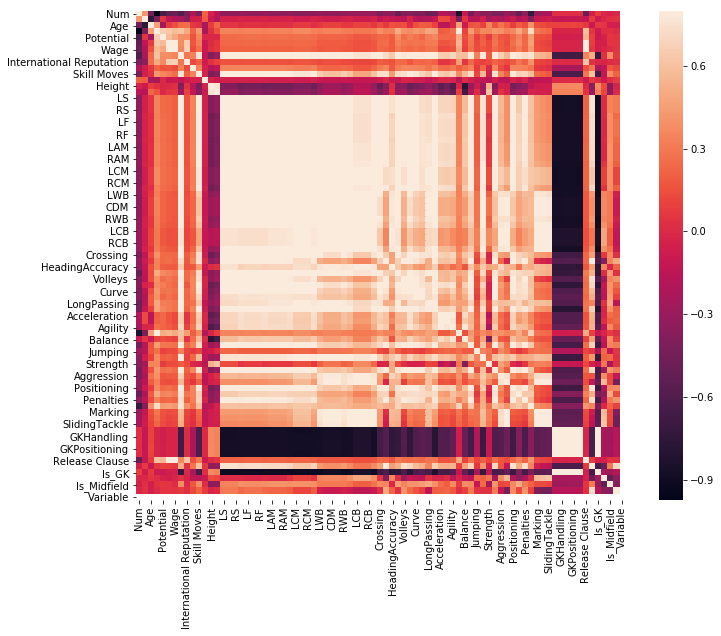

In [14]:
corrmat = df_fifa.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

# Write to CSV

In [15]:
export_csv = df_fifa.to_csv(r'../out/clean.csv', index=None, header=True)